## Imports

In [1]:
import os, random, PIL, time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dataget import data # <== dataget
import tensorflow as tf
from name import network_name, model_path
from tfinterface.supervised import SupervisedInputs
from PIL import Image
from model import Model

%matplotlib inline

## Get Dataset
Using the function `data` from `dataget` we call the dataset `german-traffic-signs` and execute the method `get` to get the data object in case we dont have the data yet.

In [2]:
dataset = data("german-traffic-signs").get()

### Create ConvNet and Load model

In [3]:
# seed: repetible results
seed = 31
np.random.seed(seed=seed)
random.seed(seed)

graph = tf.Graph()
sess = tf.Session(graph=graph)

size = 32

# inputs
inputs = SupervisedInputs(
    name = network_name + "_inputs",
    graph = graph,
    sess = sess,
    # tensors
    features = dict(shape = (None, size, size, 3)),
    labels = dict(shape = (None,), dtype = tf.uint8)
)

# create model template
template = Model(
    n_classes = 43,
    name = network_name,
    model_path = model_path,
    graph = graph,
    sess = sess,
    seed = seed,
)

#model
inputs = inputs()
model = template(inputs)

#load model
model.initialize(restore=True)

INFO:tensorflow:Restoring parameters from /home/carlosbd/retoColombIA/convnets-tensorflow-in-raspberry/models/red-peque


### Load Image
Lets load the test image

In [20]:
folder = "test"
features_test = []
for name in os.listdir(folder):
    im = Image.open(os.path.join(folder,name))

    if ( im.size[0] != size or im.size[1] != size): #reshape it
        im = im.resize((size, size), PIL.Image.ANTIALIAS)
        
    features_test.append(np.array(im))
    
features_test =  np.stack(features_test)
features_test.shape

(20, 32, 32, 3)

### Make Inference and compare to a known image

[21  2 23 38 40 16 14 40 35 40 14 33 13 12 14 11  1 28 17 12]


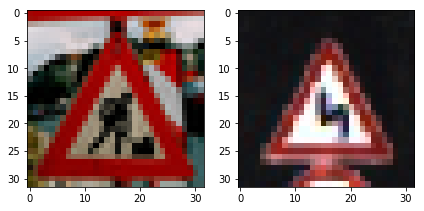

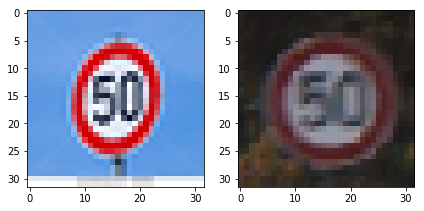

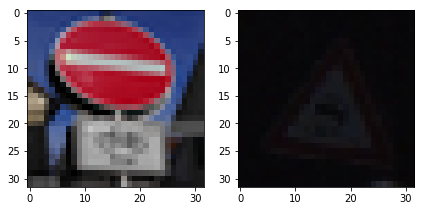

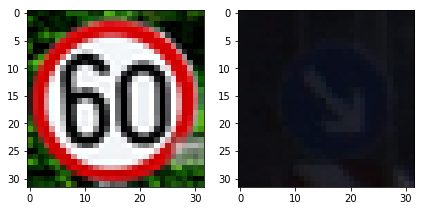

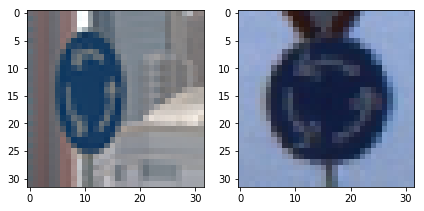

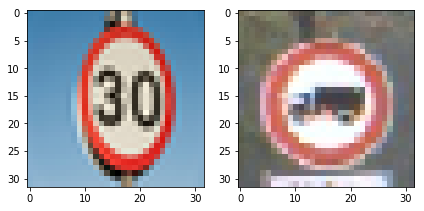

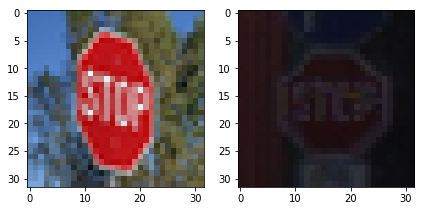

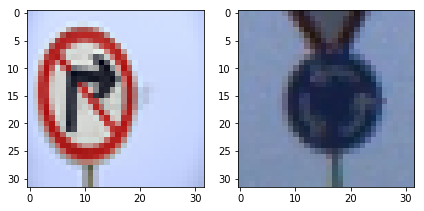

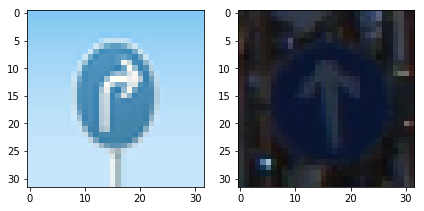

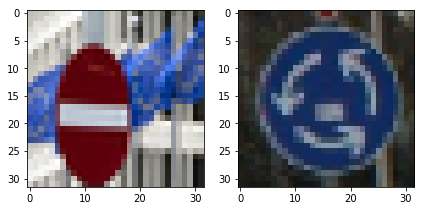

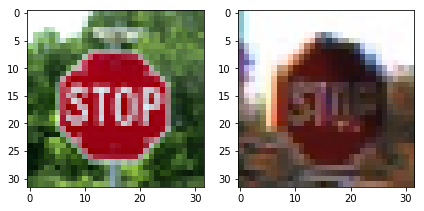

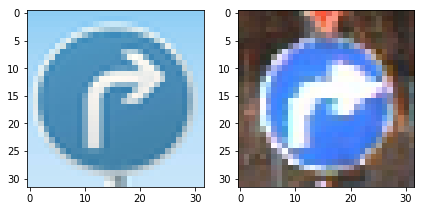

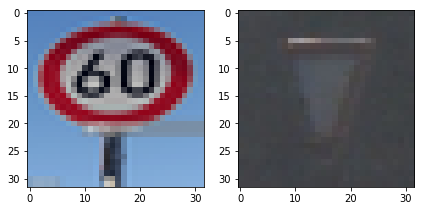

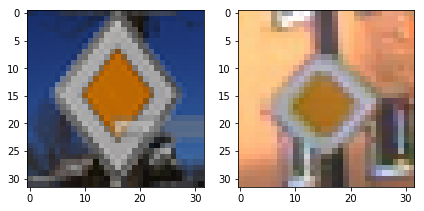

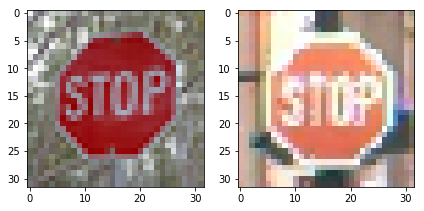

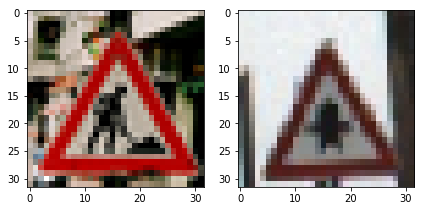

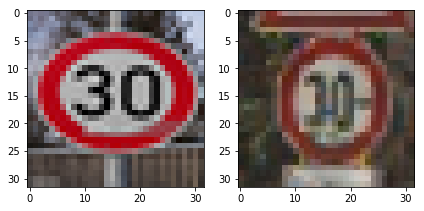

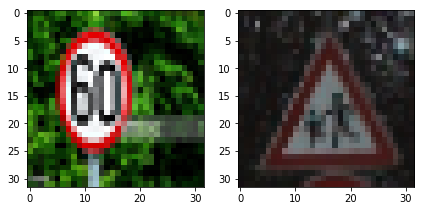

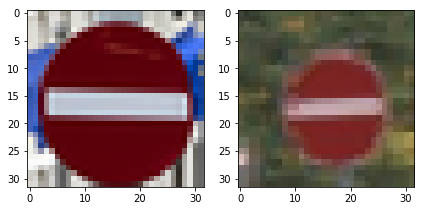

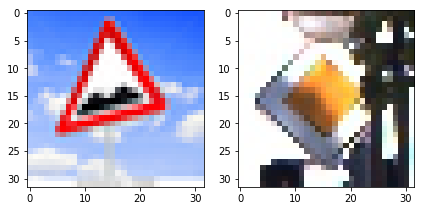

In [21]:
predictions = model.predict(features = features_test)
predictions = np.argmax(predictions, axis=1)

print predictions

for pred, features in zip(predictions, features_test):
    
    reference_img = dataset.test_set.get_nclass_sample(pred)

    f, (ax1, ax2) = plt.subplots(1, 2) #, figsize=(10,10)
    ax1.imshow(features)
    ax2.imshow(reference_img)

    f.tight_layout()

    plt.show()

